In [1]:
# Importing the libraries to read the dataset
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading and printing the dataset
df = pd.read_csv('train.csv')
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [3]:
# Dropping the 1st 5 column as it is of no significant
df = df.drop(['id','circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'], axis=1)
df.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,0.53,15.93,0.00,53.99,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,111.095,7.26,16.01,0.00,68.76,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,21.28,4.83,6.13,56.99,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [4]:
# Printing the percentage of NaN values for each column
with pd.option_context('display.max_rows',None): 
    display(round(df.isnull().sum().sort_values(ascending=False)/len(df),2)*100)

av_rech_amt_data_6          75.0
date_of_last_rech_data_6    75.0
count_rech_3g_6             75.0
max_rech_data_6             75.0
total_rech_data_6           75.0
arpu_3g_6                   75.0
arpu_2g_6                   75.0
night_pck_user_6            75.0
count_rech_2g_6             75.0
fb_user_6                   75.0
arpu_3g_7                   74.0
arpu_2g_7                   74.0
date_of_last_rech_data_7    74.0
night_pck_user_7            74.0
total_rech_data_7           74.0
fb_user_7                   74.0
av_rech_amt_data_7          74.0
max_rech_data_7             74.0
count_rech_3g_7             74.0
count_rech_2g_7             74.0
av_rech_amt_data_8          74.0
count_rech_3g_8             74.0
date_of_last_rech_data_8    74.0
count_rech_2g_8             74.0
fb_user_8                   74.0
total_rech_data_8           74.0
arpu_3g_8                   74.0
max_rech_data_8             74.0
night_pck_user_8            74.0
arpu_2g_8                   74.0
loc_og_mou

In [5]:
# Printing the Shape of the dataset
df.shape

(69999, 167)

In [6]:
# Dropping the column if the null percentage is greater than 70%
for i in df.columns:
    if round(df[i].isnull().sum()/len(df),2)>0.70:
        df.drop(i,axis=1,inplace=True)

In [7]:
# Printing the percentage of NaN values for each column
with pd.option_context('display.max_rows',None): 
    display(round(df.isnull().sum().sort_values(ascending=False)/len(df),2))

loc_ic_t2f_mou_8        0.05
roam_og_mou_8           0.05
loc_og_t2t_mou_8        0.05
loc_og_t2m_mou_8        0.05
loc_ic_mou_8            0.05
std_ic_t2t_mou_8        0.05
std_ic_t2m_mou_8        0.05
loc_og_t2f_mou_8        0.05
std_ic_t2f_mou_8        0.05
loc_og_t2c_mou_8        0.05
std_ic_t2o_mou_8        0.05
loc_og_mou_8            0.05
ic_others_8             0.05
std_ic_mou_8            0.05
isd_ic_mou_8            0.05
std_og_t2t_mou_8        0.05
std_og_t2f_mou_8        0.05
loc_ic_t2m_mou_8        0.05
spl_ic_mou_8            0.05
spl_og_mou_8            0.05
std_og_t2c_mou_8        0.05
std_og_mou_8            0.05
roam_ic_mou_8           0.05
std_og_t2m_mou_8        0.05
isd_og_mou_8            0.05
offnet_mou_8            0.05
og_others_8             0.05
loc_ic_t2t_mou_8        0.05
onnet_mou_8             0.05
loc_ic_t2m_mou_6        0.04
std_og_mou_6            0.04
std_og_t2m_mou_6        0.04
isd_og_mou_6            0.04
std_ic_mou_6            0.04
spl_og_mou_6  

In [8]:
# Printing the size of the dataset
df.shape

(69999, 137)

In [9]:
# Printing the unique values for each columns
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('------------------------------------')

last_date_of_month_6
['6/30/2014']
------------------------------------
last_date_of_month_7
['7/31/2014' nan]
------------------------------------
last_date_of_month_8
['8/31/2014' nan]
------------------------------------
arpu_6
[ 31.277   0.     60.806 ... 372.088 238.575 168.269]
------------------------------------
arpu_7
[ 87.009 122.787 103.176 ... 258.374 245.414  42.815]
------------------------------------
arpu_8
[  7.527  42.953   0.    ... 279.782 145.062 167.961]
------------------------------------
onnet_mou_6
[ 48.58   0.     0.53 ... 486.49 399.01 116.54]
------------------------------------
onnet_mou_7
[124.38   0.    15.93 ... 453.83 378.21 283.63]
------------------------------------
onnet_mou_8
[  1.29   0.     6.13 ... 458.79 380.99 232.63]
------------------------------------
offnet_mou_6
[ 32.24   0.    53.99 ... 617.98 360.88 575.46]
------------------------------------
offnet_mou_7
[ 96.68  25.99  82.05 ... 772.53 645.89 236.61]
--------------------------------

In [10]:
# Getting the basic information
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 137 columns):
 #   Column                Dtype  
---  ------                -----  
 0   last_date_of_month_6  object 
 1   last_date_of_month_7  object 
 2   last_date_of_month_8  object 
 3   arpu_6                float64
 4   arpu_7                float64
 5   arpu_8                float64
 6   onnet_mou_6           float64
 7   onnet_mou_7           float64
 8   onnet_mou_8           float64
 9   offnet_mou_6          float64
 10  offnet_mou_7          float64
 11  offnet_mou_8          float64
 12  roam_ic_mou_6         float64
 13  roam_ic_mou_7         float64
 14  roam_ic_mou_8         float64
 15  roam_og_mou_6         float64
 16  roam_og_mou_7         float64
 17  roam_og_mou_8         float64
 18  loc_og_t2t_mou_6      float64
 19  loc_og_t2t_mou_7      float64
 20  loc_og_t2t_mou_8      float64
 21  loc_og_t2m_mou_6      float64
 22  loc_og_t2m_mou_7      float64
 23  loc_og_t2m

In [11]:
# Droping the column of the datatype object as it is of no significant
for i in df.columns:
    if df[i].dtype == 'O':
        df.drop(i,axis=1,inplace=True)

In [12]:
# Getting the basic stats for the dataset
with pd.option_context('display.max_columns',None):
    display(df.describe(percentiles=[0,0.25,0.50,0.75,0.90]))

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,283.134365,278.185912,278.858826,133.153275,133.894438,132.978257,198.874771,197.153383,196.543577,9.765435,7.014568,7.004892,14.186457,9.842191,9.771783,46.904854,46.166503,45.686109,93.238231,90.799240,91.121447,3.743179,3.777031,3.661652,1.126025,1.361052,1.420840,143.893585,140.750120,140.476486,80.619382,83.775851,83.471486,88.152110,91.538615,90.586999,1.126377,1.084062,1.057739,0.0,0.0,0.0,169.900601,176.4

In [13]:
# Replacing the NaN values with the median values
for i in df.columns:
    df[i].fillna(df[i].median(),inplace=True)

In [14]:
# Printing the percentage of NaN values for each column
with pd.option_context('display.max_rows',None): 
    display(round(df.isnull().sum()/len(df),2))

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_m

In [15]:
# Getting the basic stats for the dataset
with pd.option_context('display.max_columns',None):
    display(df.describe(percentiles=[0,0.25,0.50,0.75,0.90]))

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,69999.000000,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,283.134365,278.185912,278.858826,129.236765,129.993840,127.641721,194.825731,193.112523,191.002562,9.379276,6.745305,6.634328,13.625476,9.464386,9.254848,45.521038,44.838857,43.890335,91.173739,88.855772,88.435599,3.595161,3.632045,3.467948,1.081499,1.308807,1.345676,140.781376,137.782090,136.405430,77.431415,80.560009,79.055781,84.823656,88.167203,85.96945,1.081836,1.042449,1.001784,0.0,0.0,0.0,163.645994,170.062

In [16]:
# Printing the proportion of churn and not churn
round(df['churn_probability'].value_counts(normalize=True)*100,2)

0    89.81
1    10.19
Name: churn_probability, dtype: float64

In [17]:
# Creating a dataframe based on the median value for each feature for churn and not churn
df_median = pd.DataFrame()
df_median['churn_median'] = df[df['churn_probability']==1].describe().median()
df_median['not_churn_median'] = df[df['churn_probability']==0].describe().median()

In [18]:
# Printng the dataframe df_median
with pd.option_context('display.max_rows',None):
    display(df_median)

,churn_median,not_churn_median
arpu_6,347.006328,304.010952
arpu_7,254.312450,315.561600
arpu_8,125.619815,327.398962
onnet_mou_6,161.539580,117.196131
onnet_mou_7,101.619496,121.289108
onnet_mou_8,47.534056,126.189337
offnet_mou_6,226.712698,207.300961
offnet_mou_7,152.575698,211.042797
offnet_mou_8,95.966460,217.835673
roam_ic_mou_6,8.508991,4.313639


In [19]:
# Creating a function diff_calculator, calculating the ratio of churn to not churn
def diff_calculator(df_median):
    churn_abs = abs(df_median['churn_median'])
    not_churn_abs = abs(df_median['not_churn_median'])
    min_churn_not_churn = max(churn_abs,not_churn_abs)
    return round((abs(churn_abs - not_churn_abs))/min_churn_not_churn*100,2)

In [20]:
# Calling the funtion diff_calculator
df_median['Difference(%)'] = df_median.apply(diff_calculator,axis=1)

In [21]:
# Printing the data frame df_median
with pd.option_context('display.max_rows',None):
    display(df_median)

,churn_median,not_churn_median,Difference(%)
arpu_6,347.006328,304.010952,12.39
arpu_7,254.312450,315.561600,19.41
arpu_8,125.619815,327.398962,61.63
onnet_mou_6,161.539580,117.196131,27.45
onnet_mou_7,101.619496,121.289108,16.22
onnet_mou_8,47.534056,126.189337,62.33
offnet_mou_6,226.712698,207.300961,8.56
offnet_mou_7,152.575698,211.042797,27.70
offnet_mou_8,95.966460,217.835673,55.95
roam_ic_mou_6,8.508991,4.313639,49.30


In [22]:
# Choosing the feature only if the ratio is greater than 50%
df_median = df_median[df_median['Difference(%)'] > 50]
with pd.option_context('display.max_rows',None):
    display(df_median)

,churn_median,not_churn_median,Difference(%)
arpu_8,125.619815,327.398962,61.63
onnet_mou_8,47.534056,126.189337,62.33
offnet_mou_8,95.966460,217.835673,55.95
roam_ic_mou_7,8.524696,2.874961,66.27
roam_ic_mou_8,8.296213,2.872281,65.38
roam_og_mou_6,13.872229,6.190687,55.37
roam_og_mou_7,12.327602,4.074019,66.95
roam_og_mou_8,12.376150,4.008296,67.61
loc_og_t2t_mou_7,15.732652,44.452367,64.61
loc_og_t2t_mou_8,11.873278,44.723708,73.45


In [23]:
# Fitting the Feature for which the churn median is greater than not churn
df_median[df_median['churn_median']>df_median['not_churn_median']]

,churn_median,not_churn_median,Difference(%)
roam_ic_mou_7,8.524696,2.874961,66.27
roam_ic_mou_8,8.296213,2.872281,65.38
roam_og_mou_6,13.872229,6.190687,55.37
roam_og_mou_7,12.327602,4.074019,66.95
roam_og_mou_8,12.376150,4.008296,67.61
std_og_t2t_mou_6,107.939588,47.381947,56.10
std_og_mou_6,287.763953,134.893385,53.12
churn_probability,1.000000,0.000000,100.00


In [24]:
# Re-organzing the df_median
df_median = df[df_median.index]
df.shape

(69999, 131)

In [25]:
# Creating the new dataframe by combining month of august, june & july
df_month = pd.DataFrame()
for i in df.columns:
    try:
        df_month[i[:-2]] = df[i[:-1]+'6']+df[i[:-1]+'7']+df[i[:-1]+'8']
    except:
        pass
with pd.option_context('display.max_columns',None):
    display(df_month)

,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,loc_og_t2c_mou,loc_og_mou,std_og_t2t_mou,std_og_t2m_mou,std_og_t2f_mou,std_og_t2c_mou,std_og_mou,isd_og_mou,spl_og_mou,og_others,total_og_mou,loc_ic_t2t_mou,loc_ic_t2m_mou,loc_ic_t2f_mou,loc_ic_mou,std_ic_t2t_mou,std_ic_t2m_mou,std_ic_t2f_mou,std_ic_t2o_mou,std_ic_mou,total_ic_mou,spl_ic_mou,isd_ic_mou,ic_others,total_rech_num,total_rech_amt,max_rech_amt,last_day_rch_amt,vol_2g_mb,vol_3g_mb,monthly_2g,sachet_2g,monthly_3g,sachet_3g
0,125.813,174.25,131.25,0.00,0.00,2.51,23.66,0.00,0.00,26.18,171.73,99.36,0.00,0.0,271.09,0.00,8.83,0.38,306.52,13.90,38.82,0.00,52.73,7.82,42.38,0.00,0.0,50.22,105.44,0.66,0.00,1.80,7,152,140,130,0.00,0.00,0,0,0,0
1,165.740,0.00,56.88,0.00,0.00,0.00,0.00,0.00,51.80,0.00,0.00,0.00,0.00,0.0,0.00,0.00,62.39,0.00,62.39,31.30,31.18,5.41,67.91,0.00,0.00,0.00,0.0,0.00,67.92,0.01,0.00,0.00,12,195,195,0,352.91,3.96,0,0,1,0
2,163.982,16.46,136.04,0.00,0.00,13.51,24.11,0.00,2.14,37.62,2.94,110.99,0.00,0.0,113.93,0.00,4.27,0.00,155.85,17.16,138.55,0.00,155.73,11.69,27.07,0.00,0.0,38.77,194.76,0.00,0.00,0.25,8,190,140,120,0.00,0.00,0,0,0,0
3,472.717,23.27,197.47,0.00,1.63,10.93,106.43,0.00,8.03,117.38,12.32,45.86,0.56,0.0,58.75,0.00,49.69,0.00,225.85,53.70,155.36,8.04,217.13,0.00,11.98,0.00,0.0,11.98,229.13,0.00,0.00,0.00,9,530,270,270,0.00,0.00,0,0,0,0
4,470.464,32.24,104.73,53.64,15.73,21.12,61.23,18.23,9.85,100.61,0.00,4.35,0.00,0.0,4.35,0.00,17.00,0.00,121.96,9.49,34.40,15.28,59.21,0.00,0.00,0.00,0.0,0.00,59.21,0.00,0.00,0.00,31,548,121,65,913.16,0.00,0,19,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,755.820,18.29,870.10,14.96,0.00,9.63,150.30,0.00,3.29,159.95,8.64,704.75,0.00,0.0,713.41,0.00,15.88,0.00,889.26,60.43,396.24,1.06,457.75,0.00,33.78,0.00,0.0,33.78,491.55,0.00,0.00,0.00,31,959,290,200,388.90,0.00,0,7,0,1
69995,714.984,545.63,193.87,0.00,0.00,46.35,158.71,2.01,4.01,207.10,499.26,28.92,0.00,0.0,528.19,0.00,4.32,0.00,739.64,82.05,85.75,2.59,170.41,122.14,35.51,0.00,0.0,157.66,328.68,0.50,0.00,0.08,25,821,178,122,0.00,0.00,0,0,0,0
69996,910.244,224.01,827.32,0.00,0.00,199.85,364.03,409.42,4.10,973.33,24.16,0.00,0.00,0.0,24.16,0.21,53.64,0.00,1051.36,163.23,468.68,723.01,1354.97,0.00,0.00,4.98,0.0,4.98,1373.30,0.00,5.10,8.23,8,1273,878,577,0.00,0.00,0,0,0,0
69997,629.051,28.36,59.58,25.06,4.58,25.23,19.94,12.30,0.00,57.52,2.15,23.71,0.00,0.0,25.86,0.00,0.00,0.00,83.39,16.04,6.28,7.43,29.80,9.61,12.11,1.28,0.0,23.01,52.83,0.00,0.00,0.00,10,776,597,0,148.50,3685.84,0,0,3,0


In [26]:
# Adding the feature to the df_month which are not based on month
for i in df.columns:
    if i[:-2] not in df_month.columns:
        df_month[i] = df[i]

In [27]:
df_month['vbc_3g'] = df_month['aug_vbc_3g'] + df_month['jul_vbc_3g'] + df_month['jun_vbc_3g']
df_month.drop(['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g'],axis=1,inplace=True)

In [28]:
with pd.option_context('display.max_columns',None):
    display(df_month)

,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,loc_og_t2c_mou,loc_og_mou,std_og_t2t_mou,std_og_t2m_mou,std_og_t2f_mou,std_og_t2c_mou,std_og_mou,isd_og_mou,spl_og_mou,og_others,total_og_mou,loc_ic_t2t_mou,loc_ic_t2m_mou,loc_ic_t2f_mou,loc_ic_mou,std_ic_t2t_mou,std_ic_t2m_mou,std_ic_t2f_mou,std_ic_t2o_mou,std_ic_mou,total_ic_mou,spl_ic_mou,isd_ic_mou,ic_others,total_rech_num,total_rech_amt,max_rech_amt,last_day_rch_amt,vol_2g_mb,vol_3g_mb,monthly_2g,sachet_2g,monthly_3g,sachet_3g,aon,churn_probability,vbc_3g
0,125.813,174.25,131.25,0.00,0.00,2.51,23.66,0.00,0.00,26.18,171.73,99.36,0.00,0.0,271.09,0.00,8.83,0.38,306.52,13.90,38.82,0.00,52.73,7.82,42.38,0.00,0.0,50.22,105.44,0.66,0.00,1.80,7,152,140,130,0.00,0.00,0,0,0,0,1958,0,0.00
1,165.740,0.00,56.88,0.00,0.00,0.00,0.00,0.00,51.80,0.00,0.00,0.00,0.00,0.0,0.00,0.00,62.39,0.00,62.39,31.30,31.18,5.41,67.91,0.00,0.00,0.00,0.0,0.00,67.92,0.01,0.00,0.00,12,195,195,0,352.91,3.96,0,0,1,0,710,0,0.00
2,163.982,16.46,136.04,0.00,0.00,13.51,24.11,0.00,2.14,37.62,2.94,110.99,0.00,0.0,113.93,0.00,4.27,0.00,155.85,17.16,138.55,0.00,155.73,11.69,27.07,0.00,0.0,38.77,194.76,0.00,0.00,0.25,8,190,140,120,0.00,0.00,0,0,0,0,882,0,0.00
3,472.717,23.27,197.47,0.00,1.63,10.93,106.43,0.00,8.03,117.38,12.32,45.86,0.56,0.0,58.75,0.00,49.69,0.00,225.85,53.70,155.36,8.04,217.13,0.00,11.98,0.00,0.0,11.98,229.13,0.00,0.00,0.00,9,530,270,270,0.00,0.00,0,0,0,0,982,0,0.00
4,470.464,32.24,104.73,53.64,15.73,21.12,61.23,18.23,9.85,100.61,0.00,4.35,0.00,0.0,4.35,0.00,17.00,0.00,121.96,9.49,34.40,15.28,59.21,0.00,0.00,0.00,0.0,0.00,59.21,0.00,0.00,0.00,31,548,121,65,913.16,0.00,0,19,0,1,647,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,755.820,18.29,870.10,14.96,0.00,9.63,150.30,0.00,3.29,159.95,8.64,704.75,0.00,0.0,713.41,0.00,15.88,0.00,889.26,60.43,396.24,1.06,457.75,0.00,33.78,0.00,0.0,33.78,491.55,0.00,0.00,0.00,31,959,290,200,388.90,0.00,0,7,0,1,221,0,0.00
69995,714.984,545.63,193.87,0.00,0.00,46.35,158.71,2.01,4.01,207.10,499.26,28.92,0.00,0.0,528.19,0.00,4.32,0.00,739.64,82.05,85.75,2.59,170.41,122.14,35.51,0.00,0.0,157.66,328.68,0.50,0.00,0.08,25,821,178,122,0.00,0.00,0,0,0,0,712,0,0.00
69996,910.244,224.01,827.32,0.00,0.00,199.85,364.03,409.42,4.10,973.33,24.16,0.00,0.00,0.0,24.16,0.21,53.64,0.00,1051.36,163.23,468.68,723.01,1354.97,0.00,0.00,4.98,0.0,4.98,1373.30,0.00,5.10,8.23,8,1273,878,577,0.00,0.00,0,0,0,0,879,0,0.00
69997,629.051,28.36,59.58,25.06,4.58,25.23,19.94,12.30,0.00,57.52,2.15,23.71,0.00,0.0,25.86,0.00,0.00,0.00,83.39,16.04,6.28,7.43,29.80,9.61,12.11,1.28,0.0,23.01,52.83,0.00,0.00,0.00,10,776,597,0,148.50,3685.84,0,0,3,0,277,0,3058.18


In [29]:
# Printing the shape of original dataframe (df)
df.shape

(69999, 131)

In [30]:
# Printing the shape of dataframe based on median (df_median)
df_median.shape

(69999, 62)

In [31]:
# Printing the shape of dataframe based on month (df_month)
df_month.shape

(69999, 45)

In [32]:
# Finding the ratio of Churn & not churn for the df_median
round(df_median['churn_probability'].value_counts(normalize=True),2)

0    0.9
1    0.1
Name: churn_probability, dtype: float64

In [33]:
# Lets us consider the df_month for model builing
df_month.describe(percentiles=[0,0.25,0.50,0.75,0.80,0.85,0.90])

,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,loc_og_t2c_mou,loc_og_mou,...,last_day_rch_amt,vol_2g_mb,vol_3g_mb,monthly_2g,sachet_2g,monthly_3g,sachet_3g,aon,churn_probability,vbc_3g
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,840.179103,386.872325,578.940816,22.758909,32.344710,134.250229,268.465111,10.695154,3.735982,414.968895,...,185.210646,153.141634,386.592867,0.243618,1.279761,0.235503,0.242275,1220.639709,0.101887,194.121167
std,930.730241,811.841165,841.176240,131.265155,155.680748,413.702495,422.263273,35.735908,15.198958,676.817760,...,218.944632,542.282843,1491.127415,0.740171,4.205364,0.958917,1.615423,952.426321,0.302502,694.893433
min,40.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000
0%,40.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000
25%,316.637500,38.520000,141.220000,0.000000,0.000000,12.780000,50.530000,0.000000,0.000000,82.970000,...,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,0.000000,0.000000
50%,598.988000,114.690000,299.210000,0.000000,0.000000,39.390000,126.390000,0.760000,0.000000,196.070000,...,126.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,868.000000,0.000000,0.000000
75%,1068.735000,360.595000,673.715000,3.200000,5.830000,116.735000,313.660000,7.320000,2.350000,477.470000,...,252.000000,27.040000,0.000000,0.000000,0.000000,0.000000,0.000000,1813.000000,0.000000,0.000000
80%,1227.128400,483.670000,822.984000,8.240000,15.824000,150.334000,387.072000,10.814000,3.890000,587.104000,...,290.000000,77.192000,44.714000,0.000000,1.000000,0.000000,0.000000,2239.400000,0.000000,12.730000
85%,1437.358100,671.513000,1027.584500,17.440000,32.583000,202.360000,489.760000,16.380000,6.180000,741.643000,...,350.000000,179.539000,462.806000,0.000000,2.000000,0.000000,0.000000,2493.000000,0.000000,170.979000


In [34]:
# Segrating the churn count
df_month_churn = df_month[df_month['churn_probability']==1]

In [35]:
# for computation purpose, reducing the count of not churn
df_month = df_month[df_month['churn_probability']==0].sample(frac=0.20,random_state=1)

In [36]:
# concating the churn & not churn together
df_month = pd.concat([df_month,df_month_churn],axis=0)

In [37]:
df_month.shape

(19705, 45)

In [38]:
# Printing the percentage of churn & not churn
round(df_month['churn_probability'].value_counts(normalize=True),2)

0    0.64
1    0.36
Name: churn_probability, dtype: float64

In [39]:
# Replacing the values greater than 90% percentile with the 80% perentile value
for i in df_month.columns:
    if i not in ['churn_probability']:
        df_month[i] = df_month[i].mask(df_month[i] > df_month[i].quantile(0.90), df_month[i].quantile(0.80))

In [40]:
# Importing data visualization library
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

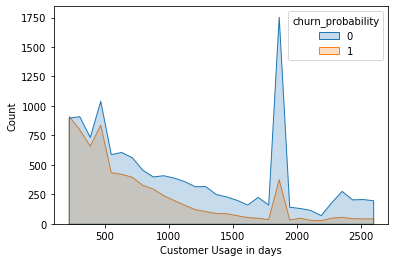

In [41]:
# Plotting the distribution of Age on network  number of days the customer is using the network
sns.histplot(data=df_month,x='aon',hue='churn_probability',element='poly')
plt.xlabel('Customer Usage in days')
plt.show()

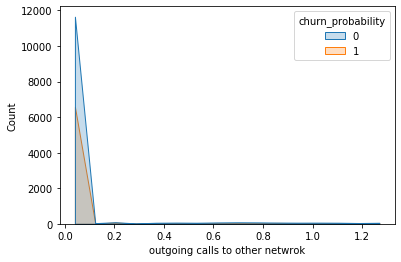

In [42]:
# Plotting the distribution of outgoing calls to other network
sns.histplot(data=df_month,x='og_others',hue='churn_probability',element='poly')
plt.xlabel('outgoing calls to other netwrok')
plt.show()

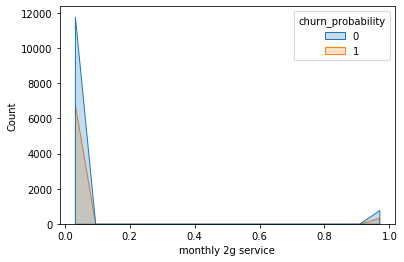

In [43]:
# Plotting the distribution of monthly 2g service
sns.histplot(data=df_month,x='monthly_2g',hue='churn_probability',element='poly')
plt.xlabel('monthly 2g service')
plt.show()

In [44]:
# String the churn probabilty feature by changing its datatype to string for visualisation purpose
df_month_churn = df_month['churn_probability'].astype('str')

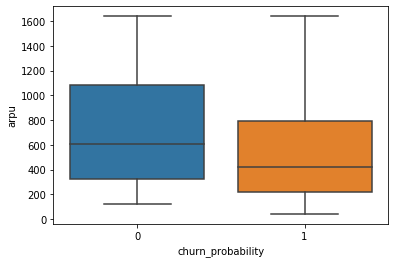

In [45]:
# Plotting box plot by comparing the arpu & churn probability
sns.boxplot(data=df_month,y='arpu',x='churn_probability')
plt.show()

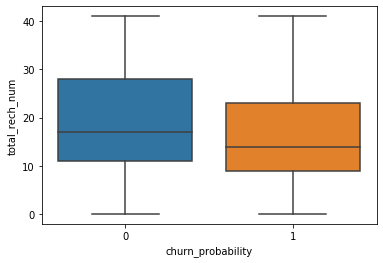

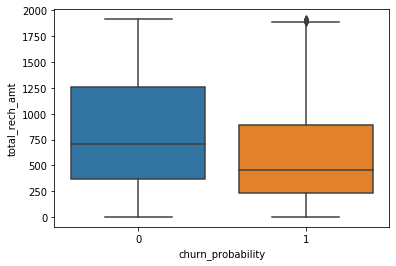

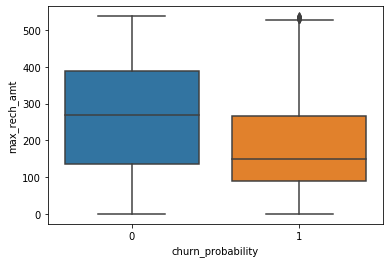

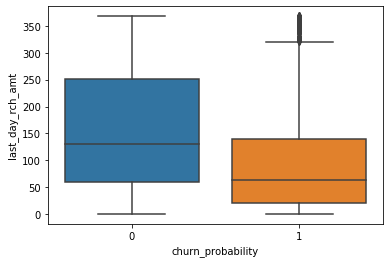

In [46]:
# Plotting the feature of recharge with the churn  probability
recharge_columns = ['total_rech_num','total_rech_amt','max_rech_amt','last_day_rch_amt']
for column in recharge_columns:
    sns.boxplot(data=df_month,y=column,x='churn_probability')
    plt.show()

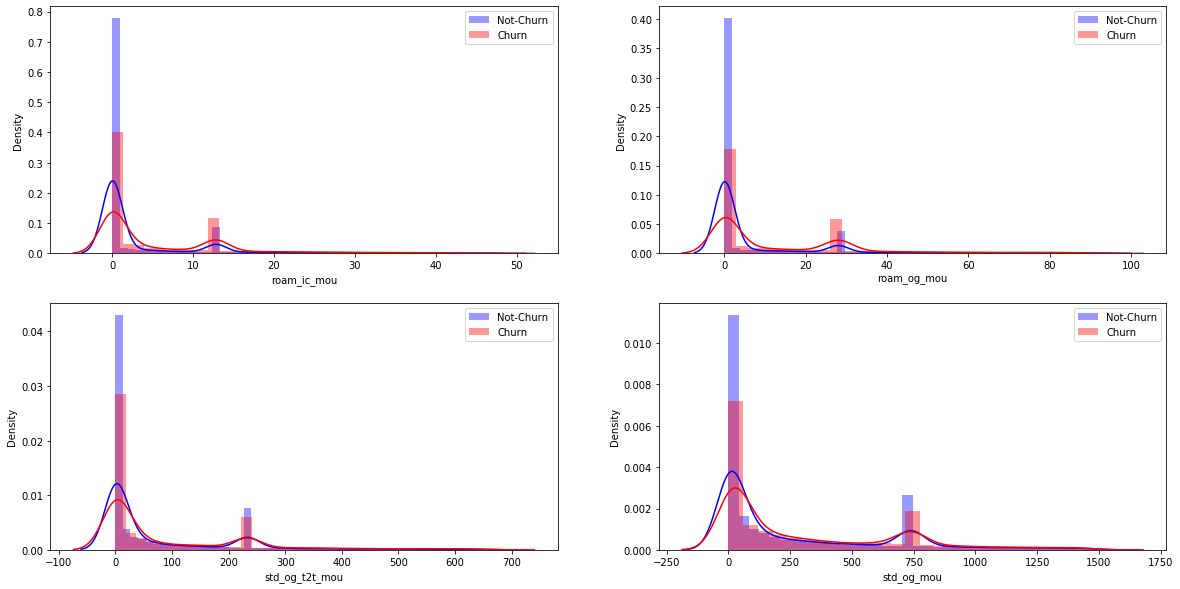

In [47]:
# Plotting the density function for certain feature with the churn  probability
columns = ['roam_ic_mou','roam_og_mou','std_og_t2t_mou','std_og_mou']
plt.figure(figsize=[20,10])
for i,column in enumerate(columns):
    plt.subplot(2,2,i+1)
    ax = sns.distplot(df_month.loc[df_month['churn_probability']==0, [column]], color='b', label='Not-Churn')
    ax = sns.distplot(df_month.loc[df_month['churn_probability']==1, [column]], color='r', label='Churn')
    ax.legend()
    plt.xlabel(column)

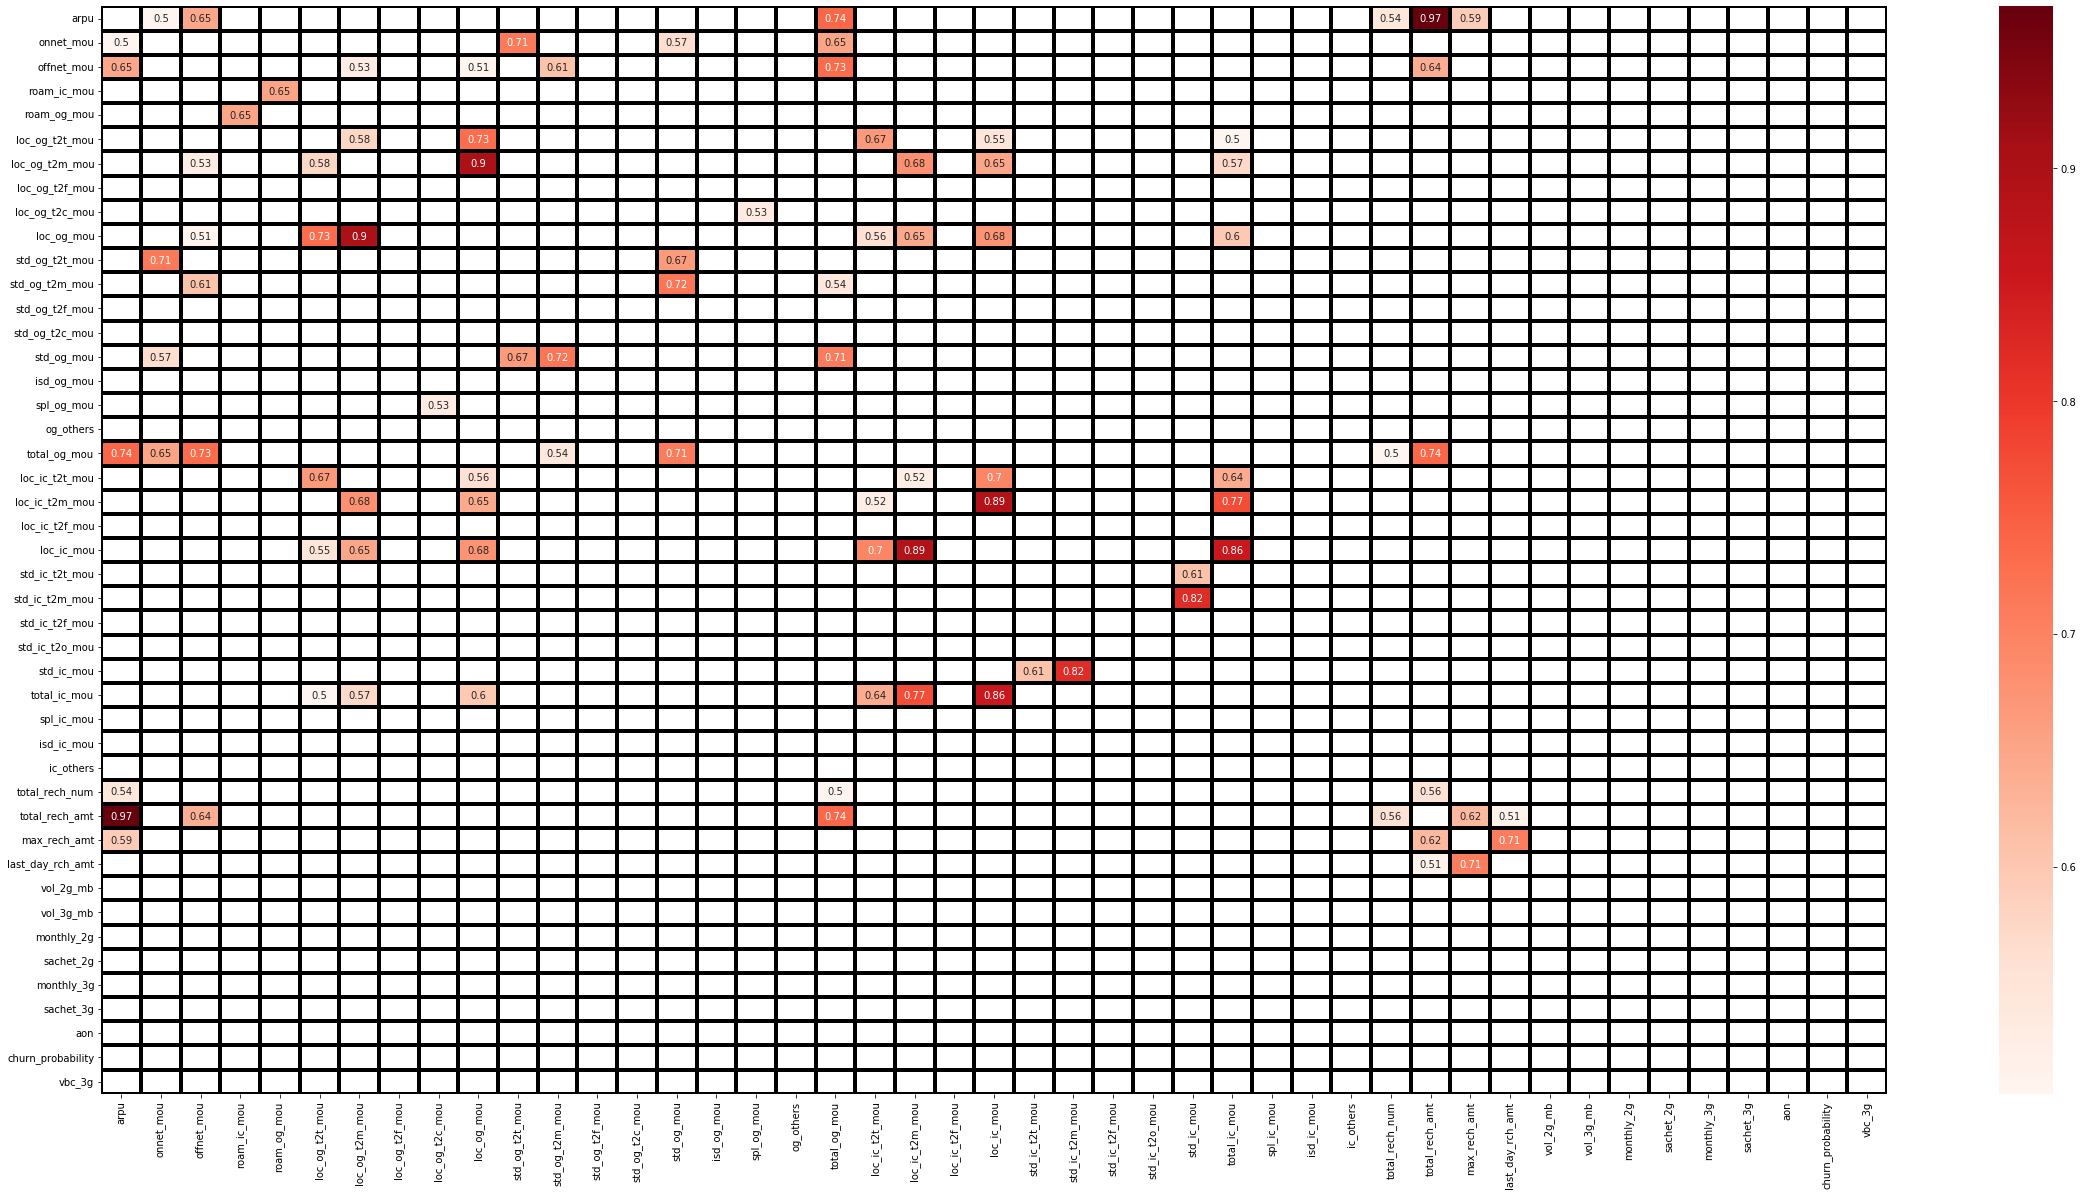

In [48]:
# Finding the positive correlation values for value greater than 0.5
df_month_corr = df_month.corr()

df_month_corr_positive = df_month_corr[(df_month_corr >= 0.5) & (df_month_corr != 1.0)] 

plt.figure(figsize=(40,20))
sns.heatmap(df_month_corr_positive, annot=True, cmap="Reds", linewidths=3, linecolor='black')
plt.show()

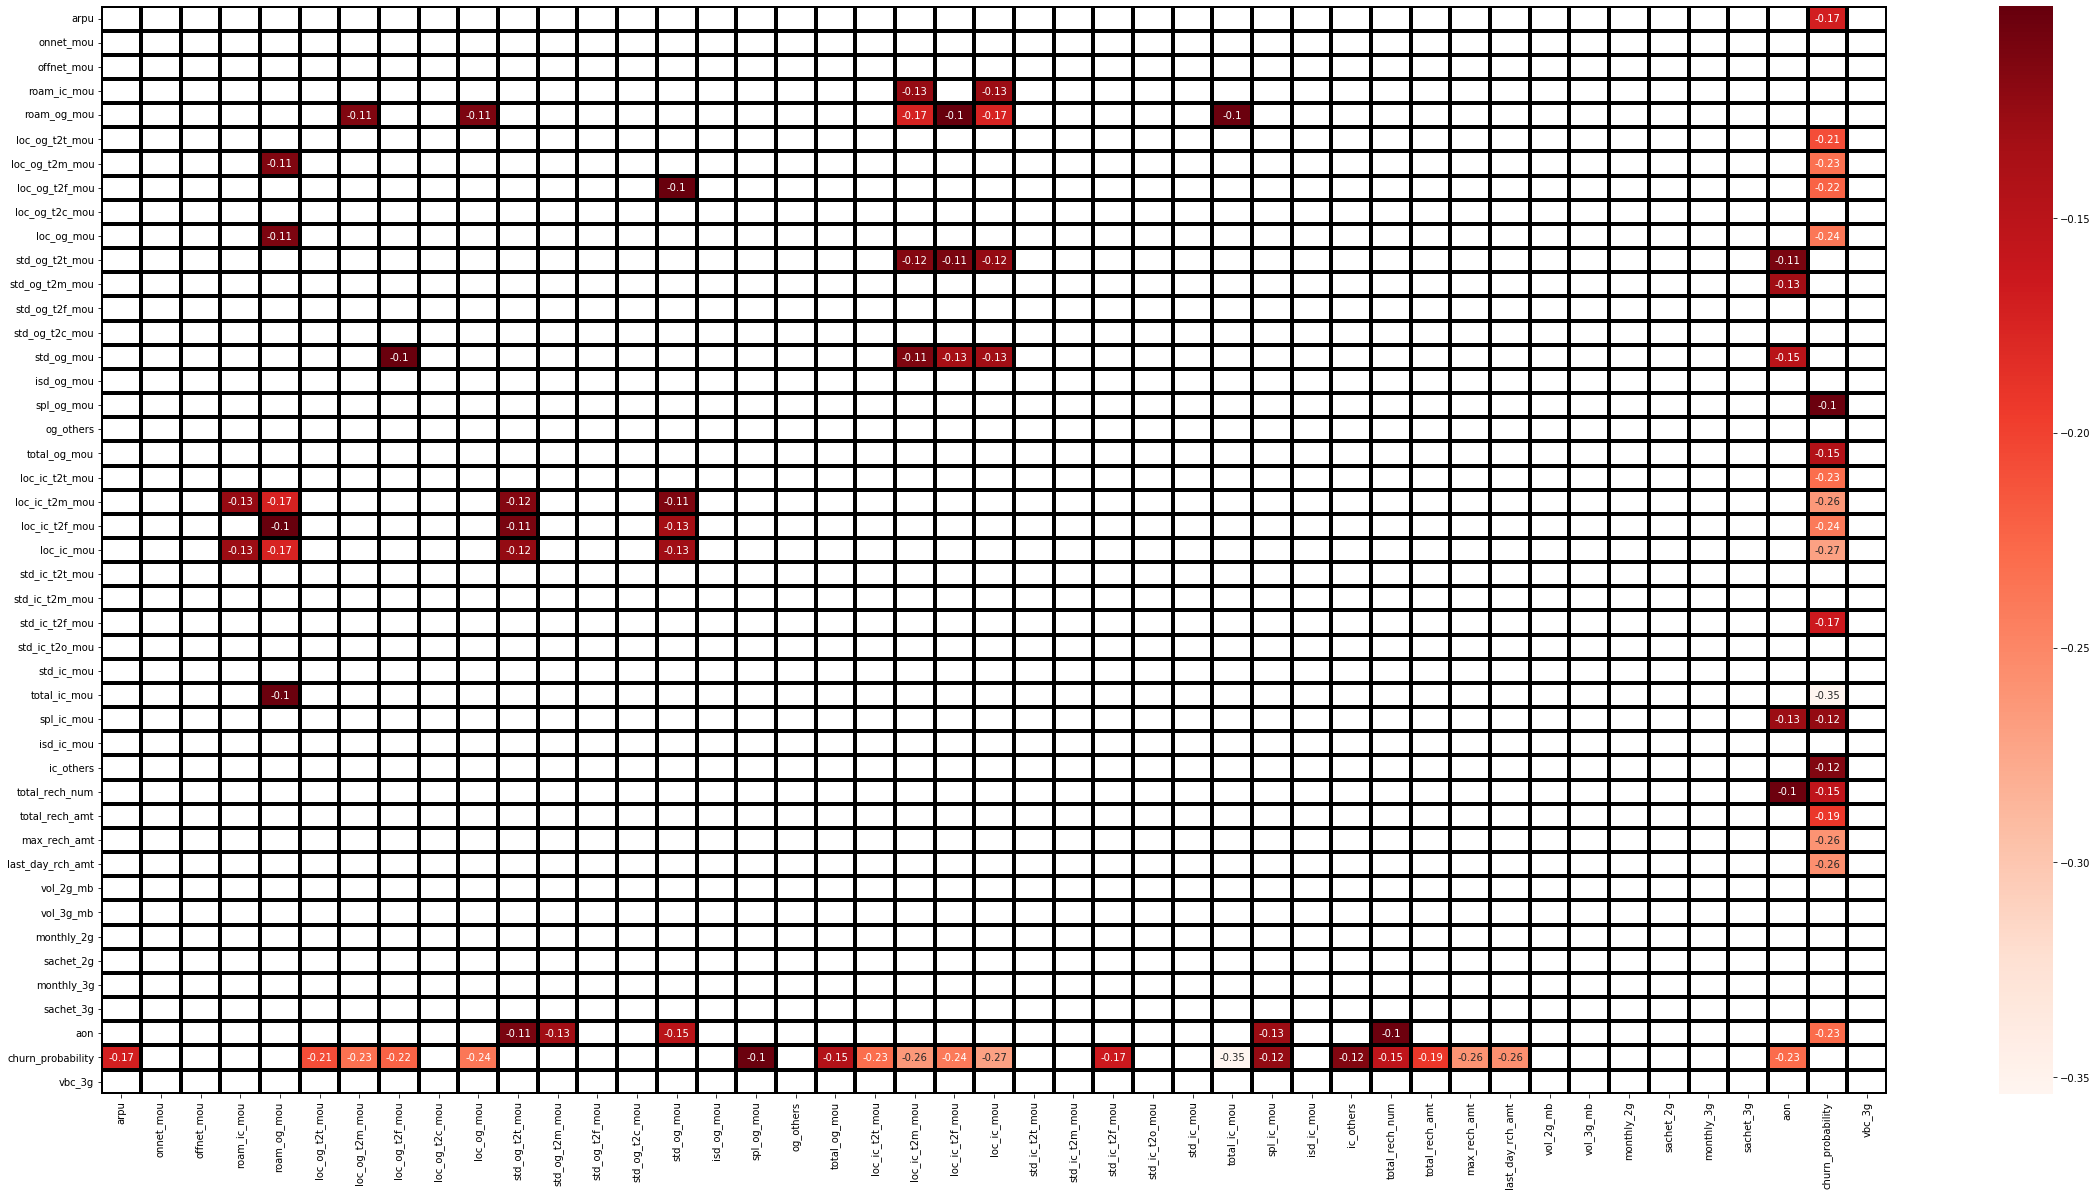

In [49]:
# # Finding the negative correlation values lesser than -0.1
df_month_corr_negative = df_month_corr[(df_month_corr <= -0.1)] 

plt.figure(figsize=(40,20))
sns.heatmap(df_month_corr_negative, annot=True, cmap="Reds", linewidths=3, linecolor='black')
plt.show()

In [50]:
# Splitting into Dependent & Independent feature
X_train = df_month.drop('churn_probability',axis=1)
y_train = df_month['churn_probability']

In [51]:
# To handle the imbalance in the dataset using the Random over sample
from imblearn.over_sampling import RandomOverSampler

Sampler = RandomOverSampler(random_state=1, sampling_strategy='not majority')
X_train,y_train = Sampler.fit_resample(X_train, y_train)

In [52]:
# Standardising the Dependent feature
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_trained = pd.DataFrame(X_train_scaled)
X_trained.columns = X_train.columns

In [53]:
X_trained.columns

Index(['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou',
       'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou',
       'std_og_t2c_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others',
       'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou',
       'loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou',
       'std_ic_t2o_mou', 'std_ic_mou', 'total_ic_mou', 'spl_ic_mou',
       'isd_ic_mou', 'ic_others', 'total_rech_num', 'total_rech_amt',
       'max_rech_amt', 'last_day_rch_amt', 'vol_2g_mb', 'vol_3g_mb',
       'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g', 'aon', 'vbc_3g'],
      dtype='object')

In [54]:
# Performing feature seletion using RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1)

In [55]:
rfecv = RFECV(estimator=logreg,cv=4)
rfecv.fit(X_trained,y_train)

RFECV(cv=4, estimator=LogisticRegression(random_state=1))

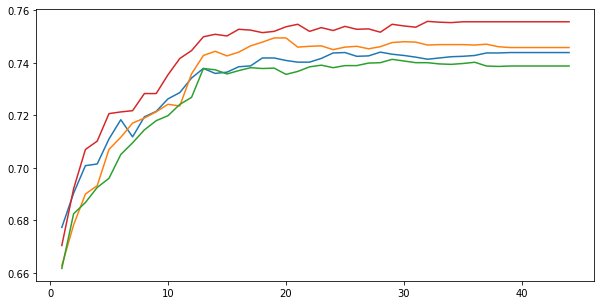

In [56]:
plt.figure(figsize=[10,5])
plt.plot(range(1,len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()

In [57]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg,n_features_to_select=15)
rfe.fit(X_trained,y_train)
X_trained_column = X_trained.columns[rfe.support_]
X_trained = X_trained.loc[:,X_trained_column]

In [58]:
# Fitting the data into  the Logestic Regression model
logreg.fit(X_trained,y_train)

LogisticRegression(random_state=1)

In [59]:
# Evaluating the model
y_train_pred = logreg.predict(X_trained)

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('accuracy score:',round(accuracy_score(y_train,y_train_pred),2))

accuracy score: 0.74


In [61]:
confusion_matrix(y_train,y_train_pred)

array([[9333, 3240],
       [3227, 9346]], dtype=int64)

In [62]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74     12573
           1       0.74      0.74      0.74     12573

    accuracy                           0.74     25146
   macro avg       0.74      0.74      0.74     25146
weighted avg       0.74      0.74      0.74     25146



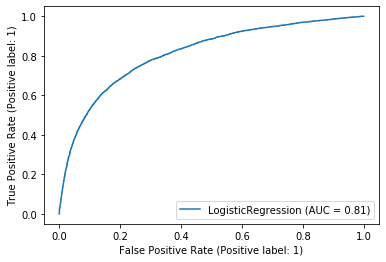

In [63]:
# Plotting the ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(logreg,X_trained,y_train)
plt.show()

In [64]:
# Importing the test dataset
df_test = pd.read_csv('test.csv')
df_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [65]:
# Dropping the 1st 5 column as it is of no significant
df_test = df_test.drop(['id','circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'], axis=1)
df_test.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,746.239,7.54,7.86,8.40,16.98,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,24.400,5.31,2.16,0.00,40.04,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,413.329,450.93,609.03,700.68,60.94,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [66]:
# Printing the number of NaN values
with pd.option_context('display.max_rows',None):
    display(round(df_test.isnull().sum()/len(df_test)*100),2)

last_date_of_month_6         0.0
last_date_of_month_7         1.0
last_date_of_month_8         1.0
arpu_6                       0.0
arpu_7                       0.0
arpu_8                       0.0
onnet_mou_6                  4.0
onnet_mou_7                  4.0
onnet_mou_8                  6.0
offnet_mou_6                 4.0
offnet_mou_7                 4.0
offnet_mou_8                 6.0
roam_ic_mou_6                4.0
roam_ic_mou_7                4.0
roam_ic_mou_8                6.0
roam_og_mou_6                4.0
roam_og_mou_7                4.0
roam_og_mou_8                6.0
loc_og_t2t_mou_6             4.0
loc_og_t2t_mou_7             4.0
loc_og_t2t_mou_8             6.0
loc_og_t2m_mou_6             4.0
loc_og_t2m_mou_7             4.0
loc_og_t2m_mou_8             6.0
loc_og_t2f_mou_6             4.0
loc_og_t2f_mou_7             4.0
loc_og_t2f_mou_8             6.0
loc_og_t2c_mou_6             4.0
loc_og_t2c_mou_7             4.0
loc_og_t2c_mou_8             6.0
loc_og_mou

2

In [67]:
# Printing the rows & column of the dataset
df_test.shape

(30000, 166)

In [68]:
# Dropping the column if the null percentage is greater than 70%
for i in df_test.columns:
    if round(df_test[i].isnull().sum()/len(df_test),2)>0.70:
        df_test.drop(i,axis=1,inplace=True)

In [69]:
# Printing the percentage of NaN values for each column
with pd.option_context('display.max_rows',None): 
    display(round(df_test.isnull().sum()/len(df_test),2))

last_date_of_month_6    0.00
last_date_of_month_7    0.01
last_date_of_month_8    0.01
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
onnet_mou_6             0.04
onnet_mou_7             0.04
onnet_mou_8             0.06
offnet_mou_6            0.04
offnet_mou_7            0.04
offnet_mou_8            0.06
roam_ic_mou_6           0.04
roam_ic_mou_7           0.04
roam_ic_mou_8           0.06
roam_og_mou_6           0.04
roam_og_mou_7           0.04
roam_og_mou_8           0.06
loc_og_t2t_mou_6        0.04
loc_og_t2t_mou_7        0.04
loc_og_t2t_mou_8        0.06
loc_og_t2m_mou_6        0.04
loc_og_t2m_mou_7        0.04
loc_og_t2m_mou_8        0.06
loc_og_t2f_mou_6        0.04
loc_og_t2f_mou_7        0.04
loc_og_t2f_mou_8        0.06
loc_og_t2c_mou_6        0.04
loc_og_t2c_mou_7        0.04
loc_og_t2c_mou_8        0.06
loc_og_mou_6            0.04
loc_og_mou_7            0.04
loc_og_mou_8            0.06
std_og_t2t_mou_6        0.04
std_og_t2t_mou

In [70]:
# Printing the size of the dataset
df_test.shape

(30000, 136)

In [71]:
# Droping the column of the datatype object as it is of no significant
for i in df_test.columns:
    if df_test[i].dtype == 'O':
        df_test.drop(i,axis=1,inplace=True)

In [72]:
# Replacing the NaN values with the median values
for i in df_test.columns:
    df_test[i].fillna(df_test[i].median(),inplace=True)

In [73]:
# Printing the percentage of NaN values for each column
with pd.option_context('display.max_rows',None): 
    display(round(df_test.isnull().sum()/len(df_test),2))

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_m

In [74]:
# Creating the new dataframe by combining month of august, june & july
df_month_test = pd.DataFrame()
for i in df.columns:
    try:
        df_month_test[i[:-2]] = df_test[i[:-1]+'6']+df_test[i[:-1]+'7']+df_test[i[:-1]+'8']
    except:
        pass
with pd.option_context('display.max_columns',None):
    display(df_month_test)

,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,loc_og_t2c_mou,loc_og_mou,std_og_t2t_mou,std_og_t2m_mou,std_og_t2f_mou,std_og_t2c_mou,std_og_mou,isd_og_mou,spl_og_mou,og_others,total_og_mou,loc_ic_t2t_mou,loc_ic_t2m_mou,loc_ic_t2f_mou,loc_ic_mou,std_ic_t2t_mou,std_ic_t2m_mou,std_ic_t2f_mou,std_ic_t2o_mou,std_ic_mou,total_ic_mou,spl_ic_mou,isd_ic_mou,ic_others,total_rech_num,total_rech_amt,max_rech_amt,last_day_rch_amt,vol_2g_mb,vol_3g_mb,monthly_2g,sachet_2g,monthly_3g,sachet_3g
0,221.657,75.12,127.15,0.00,0.00,66.17,37.38,13.58,0.03,117.15,8.95,76.14,0.00,0.0,85.09,0.00,0.03,0.0,202.27,89.87,24.33,0.26,114.48,0.00,5.74,0.00,0.0,5.74,121.55,1.27,0.00,0.00,14,253,110,60,0.00,0.00,0,0,0,0
1,1290.604,136.56,1491.12,0.00,0.00,136.56,1448.95,0.73,0.00,1586.26,0.00,41.44,0.00,0.0,41.44,0.80,0.00,0.0,1628.51,49.55,467.29,1.49,518.36,0.00,12.51,0.00,0.0,12.51,917.63,0.00,386.74,0.00,14,1500,750,250,0.00,0.00,0,0,0,0
2,1510.967,23.80,107.83,152.27,132.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,20,2500,1300,0,0.00,0.00,0,0,0,0
3,239.340,7.47,269.06,0.00,0.00,5.31,122.06,2.35,6.18,129.73,2.16,131.45,0.00,0.0,133.62,0.00,13.18,0.0,276.55,135.79,1444.71,2.02,1582.56,4.26,30.34,0.00,0.0,34.60,1627.26,0.00,10.08,0.00,10,370,260,260,0.00,0.00,0,0,0,0
4,1126.472,1760.64,158.94,0.00,0.00,15.79,15.99,0.00,0.00,31.79,1744.83,142.90,0.00,0.0,1887.75,0.00,11.06,2.2,1932.85,10.27,27.05,0.00,37.33,229.46,60.30,1.61,0.0,291.40,328.92,0.00,0.00,0.16,26,1392,350,310,0.00,0.00,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1521.279,859.88,578.46,102.54,120.89,726.19,513.53,21.13,1.68,1260.90,18.05,33.38,0.00,0.0,51.45,3.41,1.68,0.0,1317.46,601.38,886.49,25.47,1513.38,40.12,30.08,9.80,0.0,80.02,1593.43,0.00,0.00,0.00,18,1668,669,440,21.98,45.07,1,0,0,0
29996,917.378,1381.29,422.40,3.40,8.29,35.57,69.10,0.66,0.18,105.35,1344.21,341.37,0.00,0.0,1685.60,0.00,4.44,0.0,1795.42,34.13,63.35,32.62,130.14,27.82,10.87,0.00,0.0,38.69,168.85,0.00,0.00,0.00,10,1111,698,110,0.00,0.00,0,0,1,0
29997,357.897,45.91,99.26,24.59,15.58,25.32,56.23,0.00,1.65,81.56,11.49,34.88,0.00,0.0,46.38,0.00,1.65,0.0,129.61,22.99,11.13,8.06,42.22,4.41,2.13,0.00,0.0,6.54,48.76,0.00,0.00,0.00,16,390,100,100,0.00,0.00,0,0,0,0
29998,2161.472,199.43,3249.08,21.66,26.94,5.87,165.60,0.00,14.15,171.48,193.55,3037.69,0.00,0.0,3231.27,0.00,18.80,0.0,3421.58,0.56,80.15,0.00,80.72,0.14,2.06,0.00,0.0,2.20,82.93,0.00,0.00,0.00,98,2469,187,150,0.00,0.00,0,0,0,0


In [75]:
# Adding the feature to the df_month which are not based on month
for i in df_test.columns:
    if i[:-2] not in df_month_test.columns:
        df_month_test[i] = df[i]

In [76]:
df_month_test['vbc_3g'] = df_month_test['aug_vbc_3g'] + df_month_test['jul_vbc_3g'] + df_month_test['jun_vbc_3g']
df_month_test.drop(['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g'],axis=1,inplace=True)

In [77]:
with pd.option_context('display.max_columns',None):
    display(df_month_test)

,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,loc_og_t2c_mou,loc_og_mou,std_og_t2t_mou,std_og_t2m_mou,std_og_t2f_mou,std_og_t2c_mou,std_og_mou,isd_og_mou,spl_og_mou,og_others,total_og_mou,loc_ic_t2t_mou,loc_ic_t2m_mou,loc_ic_t2f_mou,loc_ic_mou,std_ic_t2t_mou,std_ic_t2m_mou,std_ic_t2f_mou,std_ic_t2o_mou,std_ic_mou,total_ic_mou,spl_ic_mou,isd_ic_mou,ic_others,total_rech_num,total_rech_amt,max_rech_amt,last_day_rch_amt,vol_2g_mb,vol_3g_mb,monthly_2g,sachet_2g,monthly_3g,sachet_3g,aon,vbc_3g
0,221.657,75.12,127.15,0.00,0.00,66.17,37.38,13.58,0.03,117.15,8.95,76.14,0.00,0.0,85.09,0.00,0.03,0.0,202.27,89.87,24.33,0.26,114.48,0.00,5.74,0.00,0.0,5.74,121.55,1.27,0.00,0.00,14,253,110,60,0.00,0.00,0,0,0,0,1958,0.00
1,1290.604,136.56,1491.12,0.00,0.00,136.56,1448.95,0.73,0.00,1586.26,0.00,41.44,0.00,0.0,41.44,0.80,0.00,0.0,1628.51,49.55,467.29,1.49,518.36,0.00,12.51,0.00,0.0,12.51,917.63,0.00,386.74,0.00,14,1500,750,250,0.00,0.00,0,0,0,0,710,0.00
2,1510.967,23.80,107.83,152.27,132.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,20,2500,1300,0,0.00,0.00,0,0,0,0,882,0.00
3,239.340,7.47,269.06,0.00,0.00,5.31,122.06,2.35,6.18,129.73,2.16,131.45,0.00,0.0,133.62,0.00,13.18,0.0,276.55,135.79,1444.71,2.02,1582.56,4.26,30.34,0.00,0.0,34.60,1627.26,0.00,10.08,0.00,10,370,260,260,0.00,0.00,0,0,0,0,982,0.00
4,1126.472,1760.64,158.94,0.00,0.00,15.79,15.99,0.00,0.00,31.79,1744.83,142.90,0.00,0.0,1887.75,0.00,11.06,2.2,1932.85,10.27,27.05,0.00,37.33,229.46,60.30,1.61,0.0,291.40,328.92,0.00,0.00,0.16,26,1392,350,310,0.00,0.00,0,0,0,0,647,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1521.279,859.88,578.46,102.54,120.89,726.19,513.53,21.13,1.68,1260.90,18.05,33.38,0.00,0.0,51.45,3.41,1.68,0.0,1317.46,601.38,886.49,25.47,1513.38,40.12,30.08,9.80,0.0,80.02,1593.43,0.00,0.00,0.00,18,1668,669,440,21.98,45.07,1,0,0,0,489,0.00
29996,917.378,1381.29,422.40,3.40,8.29,35.57,69.10,0.66,0.18,105.35,1344.21,341.37,0.00,0.0,1685.60,0.00,4.44,0.0,1795.42,34.13,63.35,32.62,130.14,27.82,10.87,0.00,0.0,38.69,168.85,0.00,0.00,0.00,10,1111,698,110,0.00,0.00,0,0,1,0,1069,0.00
29997,357.897,45.91,99.26,24.59,15.58,25.32,56.23,0.00,1.65,81.56,11.49,34.88,0.00,0.0,46.38,0.00,1.65,0.0,129.61,22.99,11.13,8.06,42.22,4.41,2.13,0.00,0.0,6.54,48.76,0.00,0.00,0.00,16,390,100,100,0.00,0.00,0,0,0,0,1740,214.65
29998,2161.472,199.43,3249.08,21.66,26.94,5.87,165.60,0.00,14.15,171.48,193.55,3037.69,0.00,0.0,3231.27,0.00,18.80,0.0,3421.58,0.56,80.15,0.00,80.72,0.14,2.06,0.00,0.0,2.20,82.93,0.00,0.00,0.00,98,2469,187,150,0.00,0.00,0,0,0,0,2201,0.00


In [78]:
# Replacing the values greater than 90% percentile value with the 80% percentile value
for i in df_month_test.columns:
    df_month_test[i] = df_month_test[i].mask(df_month_test[i] > df_month[i].quantile(0.90), df_month[i].quantile(0.80))

In [79]:
# Standardising the dataset
df_month_test = scaler.transform(df_month_test)
df_month_test = pd.DataFrame(df_month_test)
df_month_test.columns = X_train.columns
df_month_test.head()

,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,loc_og_t2c_mou,loc_og_mou,...,max_rech_amt,last_day_rch_amt,vol_2g_mb,vol_3g_mb,monthly_2g,sachet_2g,monthly_3g,sachet_3g,aon,vbc_3g
0,0.113399,0.078511,0.098996,0.000000,0.000000,0.267927,0.067290,0.370781,0.003178,0.138886,...,0.204842,0.163043,0.0,0.0,0.0,0.0,0.0,0.0,0.696254,0.0
1,0.682611,0.142724,0.588182,0.000000,0.000000,0.484407,0.569264,0.035198,0.000000,0.573982,...,0.726257,0.679348,0.0,0.0,0.0,0.0,0.0,0.0,0.215798,0.0
2,0.682611,0.024874,0.083954,0.270684,0.302828,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.726257,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.285831,0.0
3,0.124455,0.007807,0.209485,0.000000,0.000000,0.021501,0.219726,0.113308,0.380297,0.153800,...,0.484171,0.684783,0.0,0.0,0.0,0.0,0.0,0.0,0.326547,0.0
4,0.679101,0.487571,0.123747,0.000000,0.000000,0.063935,0.028784,0.000000,0.000000,0.037688,...,0.651769,0.684783,0.0,0.0,0.0,0.0,0.0,0.0,0.190147,0.0


In [80]:
# Choosing the features same as of the training dataset
df_month_test = df_month_test[X_trained_column]
df_month_test.head()

,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,std_og_mou,total_og_mou,loc_ic_mou,total_ic_mou,spl_ic_mou,total_rech_num,total_rech_amt,max_rech_amt,last_day_rch_amt,aon
0,0.113399,0.078511,0.098996,0.000000,0.000000,0.057000,0.094742,0.118305,0.101591,0.44186,0.341463,0.132253,0.204842,0.163043,0.696254
1,0.682611,0.142724,0.588182,0.000000,0.000000,0.027760,0.603340,0.535678,0.619006,0.00000,0.341463,0.685311,0.726257,0.679348,0.215798
2,0.682611,0.024874,0.083954,0.270684,0.302828,0.000000,0.000000,0.000000,0.000000,0.00000,0.487805,0.685311,0.726257,0.000000,0.285831
3,0.124455,0.007807,0.209485,0.000000,0.000000,0.089508,0.129534,0.608236,0.619006,0.00000,0.243902,0.193413,0.484171,0.684783,0.326547
4,0.679101,0.487571,0.123747,0.000000,0.000000,0.495003,0.603340,0.038577,0.274909,0.00000,0.634146,0.685311,0.651769,0.684783,0.190147


In [81]:
# Predicting the data for the testing dataset
y_test_pred = logreg.predict(df_month_test)

In [82]:
# Importing the churn probability for the testing dataset
y_test_true = pd.read_csv('sample.csv')
y_test_true.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [83]:
# Choosing only the churn probability feature
y_test_true = y_test_true['churn_probability']

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('accuracy score:',round(accuracy_score(y_test_true,y_test_pred),2))

accuracy score: 0.72


In [85]:
print(classification_report(y_test_true,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84     30000
           1       0.00      0.00      0.00         0

    accuracy                           0.72     30000
   macro avg       0.50      0.36      0.42     30000
weighted avg       1.00      0.72      0.84     30000



In [86]:
confusion_matrix(y_test_true,y_test_pred)

array([[21705,  8295],
       [    0,     0]], dtype=int64)

###### Using PCA Algorithm

In [87]:
# Standarising the original dataset's dependent features
X_train_to_pca = df.iloc[:,:-1] 
X_train_to_pca = pd.DataFrame(scaler.fit_transform(X_train_to_pca))
X_train_to_pca.columns = df.iloc[:,:-1].columns
X_train_to_pca.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,0.076359,0.037785,0.027641,0.006586,0.015247,0.00012,0.003855,0.013725,0.000166,0.000000,...,0.0,0.0000,0.0,0.0,0.000000,0.0,0.427712,0.0,0.0,0.0
1,0.075316,0.038767,0.028669,0.000000,0.000000,0.00000,0.000000,0.003690,0.002205,0.000000,...,0.0,0.0625,0.0,0.0,0.000000,0.0,0.127496,0.0,0.0,0.0
2,0.077343,0.038229,0.027423,0.000072,0.001953,0.00000,0.006456,0.011648,0.000000,0.000000,...,0.0,0.0000,0.0,0.0,0.000000,0.0,0.168872,0.0,0.0,0.0
3,0.080530,0.041031,0.030644,0.000984,0.001963,0.00000,0.008223,0.011141,0.003586,0.000000,...,0.0,0.0000,0.0,0.0,0.000000,0.0,0.192928,0.0,0.0,0.0
4,0.083342,0.038915,0.030368,0.002885,0.000592,0.00057,0.006815,0.005410,0.000687,0.018815,...,0.0,0.0000,0.0,0.0,0.030303,0.0,0.112341,0.0,0.0,0.0


In [88]:
# Using PCA algorithm
from sklearn.decomposition import PCA
pca = PCA(random_state=1)
pca.fit(X_train_to_pca)

PCA(random_state=1)

In [89]:
# Printing the variane ratio
pca.explained_variance_ratio_

array([3.77129364e-01, 1.26470279e-01, 7.03457514e-02, 5.53016047e-02,
       3.69348242e-02, 3.06712978e-02, 2.63754681e-02, 2.17568654e-02,
       2.09528882e-02, 1.65577163e-02, 1.56772486e-02, 1.24112868e-02,
       1.16959644e-02, 1.09080663e-02, 9.62352047e-03, 8.94159368e-03,
       8.01632461e-03, 6.68103149e-03, 6.49212161e-03, 6.15887885e-03,
       5.99344318e-03, 5.72987130e-03, 5.15662462e-03, 5.11106023e-03,
       4.91524592e-03, 4.83294539e-03, 4.69158367e-03, 4.63480629e-03,
       4.21434744e-03, 4.10003036e-03, 3.30585118e-03, 3.08437360e-03,
       2.97160496e-03, 2.93338077e-03, 2.75863358e-03, 2.66805474e-03,
       2.58325317e-03, 2.39574647e-03, 2.33322266e-03, 2.20804611e-03,
       2.09600311e-03, 1.92590316e-03, 1.84188038e-03, 1.79466491e-03,
       1.68725429e-03, 1.58025696e-03, 1.54424668e-03, 1.49559446e-03,
       1.40833699e-03, 1.40794208e-03, 1.38575853e-03, 1.36599977e-03,
       1.25800803e-03, 1.16590682e-03, 1.13314197e-03, 1.11659102e-03,
      

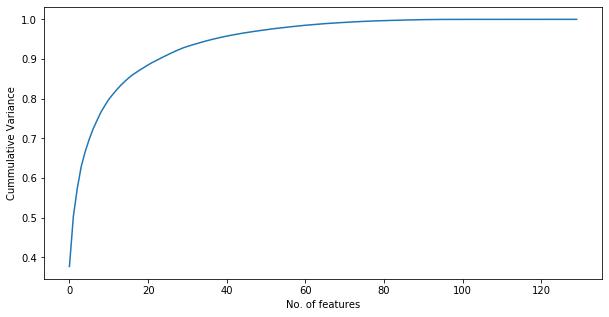

In [90]:
# Making the Scree plot for varaince
cummulative_variance = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[10,5])
plt.plot(cummulative_variance)
plt.xlabel('No. of features')
plt.ylabel('Cummulative Variance')
plt.show()

In [91]:
# Performing the PCA with the 25 features
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=25)
X_train_pca = pca_final.fit_transform(X_train_to_pca)

In [92]:
# Fitting the pca component to logistic regression model
lr_pca = LogisticRegression()
model_pca = lr_pca.fit(X_train_pca,df['churn_probability'])

In [93]:
# Predicting the dependent feature for the PCA dependent feature
y_train_pred_pca = model_pca.predict(X_train_pca)

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('accuracy score:',round(accuracy_score(df['churn_probability'],y_train_pred_pca),2))

accuracy score: 0.9


In [95]:
confusion_matrix(df['churn_probability'],y_train_pred_pca)

array([[62480,   387],
       [ 6585,   547]], dtype=int64)

In [96]:
print(classification_report(df['churn_probability'],y_train_pred_pca))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     62867
           1       0.59      0.08      0.14      7132

    accuracy                           0.90     69999
   macro avg       0.75      0.54      0.54     69999
weighted avg       0.87      0.90      0.86     69999



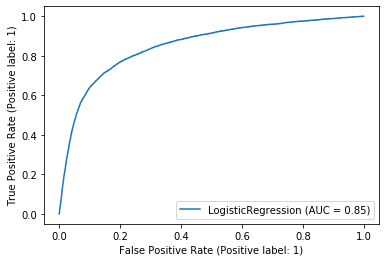

In [97]:
# Plotting the ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model_pca,X_train_pca,df['churn_probability'])
plt.show()

In [98]:
# Applying pca on the test dataset
df_test_pca = pca_final.transform(df_test)

In [99]:
# Predicting the testing dataset
y_test_pred_pca = model_pca.predict(df_test_pca)

In [100]:
# Printing the accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('accuracy score:',round(accuracy_score(y_test_true,y_test_pred_pca),2))

accuracy score: 0.96


In [101]:
# Printing the confusion matrix
confusion_matrix(y_test_true,y_test_pred_pca)

array([[28701,  1299],
       [    0,     0]], dtype=int64)

In [102]:
print(classification_report(y_test_true,y_test_pred_pca))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     30000
           1       0.00      0.00      0.00         0

    accuracy                           0.96     30000
   macro avg       0.50      0.48      0.49     30000
weighted avg       1.00      0.96      0.98     30000

